### **LOAD THƯ VIỆN**

In [26]:
import os
import re
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### **TÌM HIỂU DỮ LIỆU** 

In [3]:
df = pd.read_csv(r'DATA/emails2.csv')
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.shape

(5172, 3002)

In [7]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [8]:
df['Prediction']

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

### **TRỰC QUAN HÓA DỮ LIỆU**

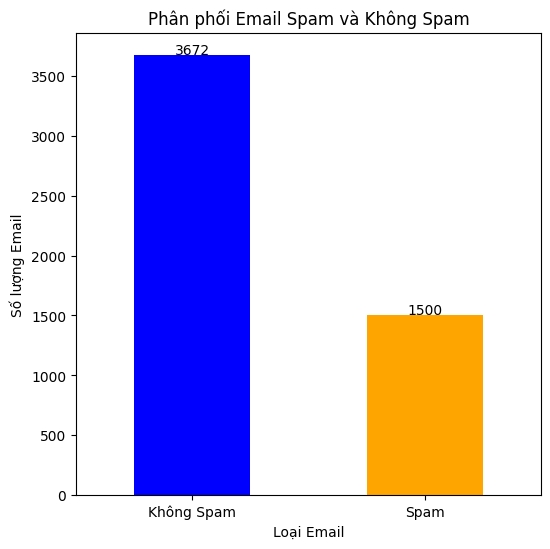

In [21]:
email_counts = df['Prediction'].value_counts()

plt.figure(figsize=(6, 6))
bars = email_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Phân phối Email Spam và Không Spam')
plt.xticks(ticks=[0, 1], labels=['Không Spam', 'Spam'], rotation=0)
plt.xlabel('Loại Email')
plt.ylabel('Số lượng Email')

for i, count in enumerate(email_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10, color='black')

plt.show()


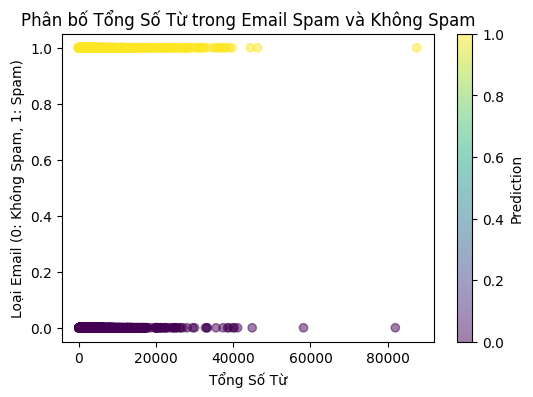

In [24]:
df['Total_Words'] = df.drop(columns=['Email No.', 'Prediction']).sum(axis=1)

plt.figure(figsize=(6,4))
plt.scatter(df['Total_Words'], df['Prediction'], alpha=0.5, c=df['Prediction'], cmap='viridis')
plt.title('Phân bố Tổng Số Từ trong Email Spam và Không Spam')
plt.xlabel('Tổng Số Từ')
plt.ylabel('Loại Email (0: Không Spam, 1: Spam)')
plt.colorbar(label='Prediction')
plt.show()


### **TRAIN MÔ HÌNH VÀ ĐÁNH GIÁ**

In [35]:
X = df.drop(columns=['Prediction', 'Email No.'])
y = df['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('SVM', SVC(kernel='linear')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

model_dir = 'MODEL'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

results = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })
    joblib.dump(model, os.path.join(model_dir, f'{model_name.lower().replace(" ", "_")}_model1.joblib'))

results_df = pd.DataFrame(results)
results_df

f:\Anaconda\envs\model_train\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.954589,0.956655,0.954589,0.955080
1,Logistic Regression,0.974879,0.974939,0.974879,0.974904
2,SVM,0.959420,0.959420,0.959420,0.959420
3,Random Forest,0.976812,0.976812,0.976812,0.976812
4,Gradient Boosting,0.972947,0.973090,0.972947,0.973001


### **TEST TRÊN NHỮNG BỘ DATASET KHÁC** 

#### ***lấy các kí tự trong bộ train***

In [36]:
col = df.drop(columns=['Prediction', 'Email No.']).columns.tolist()
with open("words.txt", 'w') as file:
    for word in col:
        file.write(word + '\n')
print(col)

['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'com', 'as', 'from', 'gas', 'or', 'not', 'me', 'deal', 'if', 'meter', 'hpl', 'please', 're', 'e', 'any', 'our', 'corp', 'can', 'd', 'all', 'has', 'was', 'know', 'need', 'an', 'forwarded', 'new', 't', 'may', 'up', 'j', 'mmbtu', 'should', 'do', 'am', 'get', 'out', 'see', 'no', 'there', 'price', 'daren', 'but', 'been', 'company', 'l', 'these', 'let', 'so', 'would', 'm', 'into', 'xls', 'farmer', 'attached', 'us', 'information', 'they', 'message', 'day', 'time', 'my', 'one', 'what', 'only', 'http', 'th', 'volume', 'mail', 'contract', 'which', 'month', 'more', 'robert', 'sitara', 'about', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'now', 'their', 'file', 'some', 'email', 'just', 'also', 'call', 'change', 'other', 'here', 'like', 'b', 'flow', 'net', 'following', 'p', 'pro

#### ***hàm đếm từ trên dataset khác***

In [37]:
def count_words(df, words_file='words.txt'):
    with open(words_file, 'r') as file:
        words = [line.strip() for line in file.readlines()]
    word_counts = pd.DataFrame()
    for word in words:
        word_counts[word] = df['email'].apply(lambda x: x.lower().split().count(word))
    word_counts['label'] = df['label']
    word_counts.to_csv('dt1_split.csv', index=False)

#### ***test_dataset1***

In [38]:
df = pd.read_csv(r'DATA/emails_test1.csv')
df.columns = ['email', 'label']
df.head(3)

,email,label
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [ ]:
count_words(df)

In [40]:
df = pd.read_csv('dt1_split.csv')
df.head(3)

,the,to,ect,and,for,of,a,you,hou,in,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Total_Words,label
0,5,4,0,5,1,4,5,3,0,2,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,4,0,2,1,1,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
model = joblib.load(r'MODEL/naive_bayes_model1.joblib')

In [43]:
X = df.drop(columns=['label'])
y = df['label']  
y_pred = model.predict(X)

print(f"Độ chính xác của:", accuracy_score(y, y_pred))
print(f"Báo cáo phân loại của:\n", classification_report(y, y_pred))

Độ chính xác của: 0.9397695530726257
Báo cáo phân loại của:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4360
           1       0.85      0.91      0.88      1368

    accuracy                           0.94      5728
   macro avg       0.91      0.93      0.92      5728
weighted avg       0.94      0.94      0.94      5728

